# References

1. https://scikit-image.org/

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [16]:
# now importign the SK libraries for image processing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from skimage.feature import hog

# SK's svm library
from sklearn import svm
from sklearn.svm import SVC

# Loading in the SK image libraries
from skimage import color
from skimage import io
from skimage import filters
from skimage import feature
from skimage import restoration
from skimage import morphology
from skimage import transform
from skimage import util

In [3]:
# loading in the data set from the file paths

test_data = ("/home/parker/data/sign_alphabet/test")
train_data = ("/home/parker/data/sign_alphabet/train")

In [4]:
'''
So all of the data in seperate folders. The folder name is the label for the images, so we will need to also extract the data from the folder name
'''

# function to get the data

def load_data(directory):
    images = []
    labels = []
    
    # Iterate over each folder in the directory
    for label in os.listdir(directory):
        folder_path = os.path.join(directory, label)
        
        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Load all images in the folder
            for image_file in os.listdir(folder_path):
                if image_file.endswith(".PNG") or image_file.endswith(".png"):
                    image_path = os.path.join(folder_path, image_file)
                    image = io.imread(image_path)
                    images.append(image)
                    labels.append(label)
    
    return np.array(images), np.array(labels)

# now we will load in the images from the file paths

# Loading the training and test data
train_images, train_labels = load_data(train_data)
test_images, test_labels = load_data(test_data)

# converting to dataframes
train_labels = pd.DataFrame(train_labels, columns=['label'])
test_labels = pd.DataFrame(test_labels, columns=['label'])

In [5]:
test_images

array([[[[196, 171, 133],
         [207, 186, 153],
         [213, 193, 164],
         ...,
         [171, 150, 119],
         [168, 146, 118],
         [167, 145, 118]],

        [[189, 162, 120],
         [203, 182, 149],
         [211, 193, 165],
         ...,
         [168, 146, 116],
         [166, 144, 116],
         [167, 144, 118]],

        [[184, 154, 109],
         [196, 172, 135],
         [205, 185, 152],
         ...,
         [163, 140, 110],
         [162, 138, 110],
         [165, 141, 114]],

        ...,

        [[197, 170, 129],
         [197, 170, 129],
         [197, 170, 128],
         ...,
         [137,  88,  69],
         [135,  88,  68],
         [132,  86,  67]],

        [[191, 166, 137],
         [189, 164, 135],
         [189, 163, 135],
         ...,
         [138,  89,  69],
         [136,  89,  69],
         [134,  88,  69]],

        [[188, 162, 135],
         [187, 162, 134],
         [187, 161, 134],
         ...,
         [136,  88,  67],
        

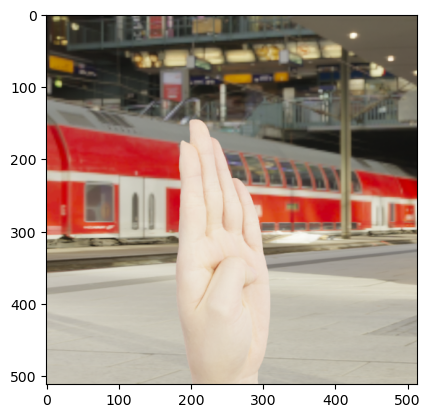

In [6]:
# using matplotlib to display the first image from the training set

plt.imshow(train_images[0])
plt.axis('on')
plt.show()

In [7]:
# printing the label of the first image
print(train_labels.iloc[0])

label    B
Name: 0, dtype: object


In [8]:
# We will use the HOG (Histogram of Oriented Gradients) feature descriptor to extract features from the images

# Function to extract HOG features from the images
def extract_features(images):
    hog_features = []
    
    for image in images:
        # convert to grayscale
        gray_image = color.rgb2gray(image)
        
        # get the HOG features
        features = hog(gray_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
        hog_features.append(features)
    
    return np.array(hog_features)

In [9]:
# extracting HOG features from the training and test images

train_features = extract_features(train_images)
test_features = extract_features(test_images)

In [10]:
# Saving the extract features to disk using numpy's savez function

save_path = "/home/parker/data/sign_alphabet/test_arrays/sign_language_features.npz"
np.savez(save_path, train_features=train_features, test_features=test_features)

In [11]:
# dropping everything from memory 
del train_images, test_images
del train_features, test_features

In [12]:
# reloading the features from the disk
data = np.load(save_path)
train_features = data['train_features']
test_features = data['test_features']

In [13]:
# Splitting the training data into training and validation sets for the classification model
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

In [17]:
# Create the SVM model
model = SVC(kernel='linear', C=0.1, random_state=42)

In [18]:
# Train the model
model.fit(X_train, y_train)

/home/parker/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, kernel='linear', random_state=42)

In [19]:
# tesing the model on the validation set
y_pred = model.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)

In [20]:
# printing the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.9923868312757201


In [21]:
# printing the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           A       0.98      0.99      0.99       182
           B       0.99      0.99      0.99       173
       Blank       0.97      0.98      0.97       179
           C       1.00      1.00      1.00       191
           D       0.99      0.99      0.99       182
           E       1.00      1.00      1.00       192
           F       0.99      0.99      0.99       183
           G       1.00      0.99      0.99       182
           H       0.98      1.00      0.99       196
           I       1.00      1.00      1.00       186
           J       1.00      0.99      1.00       183
           K       1.00      1.00      1.00       172
           L       1.00      0.99      0.99       175
           M       0.99      0.99      0.99       151
           N       0.98      1.00      0.99       206
           O       1.00      1.00      1.00       191
           P       0.97      0.99      0.98       196
           Q       0.97    

In [22]:
# saving the model down to disk
import joblib


model_path = "/home/parker/data/sign_alphabet/sign_language_model.pkl"

In [23]:
# verify the model saved to disk
joblib.dump(model, model_path)

['/home/parker/data/sign_alphabet/sign_language_model.pkl']

### Saved the model to the model folder!!!!!